<a href="https://colab.research.google.com/github/SadeemAlasiri/week3Exam/blob/main/Copy_of_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


## Load the Data

In [249]:
df=pd.read_csv('/content/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [250]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [252]:
df.shape

(52000, 26)

In [253]:
df.duplicated().sum()

43

In [254]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [255]:
df.dropna(inplace=True)

In [256]:
df.drop_duplicates(inplace=True)

In [257]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [258]:
df.duplicated().sum()

0

In [259]:
df.drop(columns='Date',inplace=True)

In [62]:
onehot_Encod=OneHotEncoder()
onehot_Encod.fit(df)

OneHotEncoder()

In [64]:
onehot_Encod.transform(df)

<49986x169928 sparse matrix of type '<class 'numpy.float64'>'
	with 1299636 stored elements in Compressed Sparse Row format>

In [71]:
# df=pd.DataFrame(onehot_Encod)

In [260]:
df['Did_Police_Officer_Attend_Scene_of_Accident']=pd.Categorical(df['Did_Police_Officer_Attend_Scene_of_Accident'])
df['Did_Police_Officer_Attend_Scene_of_Accident']=df['Did_Police_Officer_Attend_Scene_of_Accident'].cat.codes
df['Did_Police_Officer_Attend_Scene_of_Accident']

,Did_Police_Officer_Attend_Scene_of_Accident
0,1
1,1
2,1
3,1
4,1
...,...
51995,1
51996,1
51997,1
51998,1


In [261]:
df['Road_Surface_Conditions']=pd.Categorical(df['Road_Surface_Conditions'])
df['Road_Surface_Conditions']=df['Road_Surface_Conditions'].cat.codes
df['Road_Surface_Conditions']

,Road_Surface_Conditions
0,1
1,0
2,0
3,5
4,0
...,...
51995,0
51996,0
51997,5
51998,5


In [262]:
df['Weather_Conditions']=pd.Categorical(df['Weather_Conditions'])
df['Weather_Conditions']=df['Weather_Conditions'].cat.codes
df['Weather_Conditions']

,Weather_Conditions
0,4
1,1
2,1
3,5
4,1
...,...
51995,1
51996,1
51997,5
51998,5


In [263]:
df['Light_Conditions']=pd.Categorical(df['Light_Conditions'])
df['Light_Conditions']=df['Light_Conditions'].cat.codes
df['Light_Conditions']

,Light_Conditions
0,0
1,2
2,4
3,4
4,4
...,...
51995,4
51996,0
51997,4
51998,4


In [264]:
df['Pedestrian_Crossing-Physical_Facilities']=pd.Categorical(df['Pedestrian_Crossing-Physical_Facilities'])
df['Pedestrian_Crossing-Physical_Facilities']=df['Pedestrian_Crossing-Physical_Facilities'].cat.codes
df['Pedestrian_Crossing-Physical_Facilities']

,Pedestrian_Crossing-Physical_Facilities
0,2
1,2
2,2
3,2
4,2
...,...
51995,3
51996,2
51997,2
51998,2


In [265]:
df['Pedestrian_Crossing-Human_Control']=pd.Categorical(df['Pedestrian_Crossing-Human_Control'])
df['Pedestrian_Crossing-Human_Control']=df['Pedestrian_Crossing-Human_Control'].cat.codes
df['Pedestrian_Crossing-Human_Control']

,Pedestrian_Crossing-Human_Control
0,2
1,2
2,2
3,2
4,2
...,...
51995,2
51996,2
51997,2
51998,2


In [266]:

df['Road_Type']=pd.Categorical(df['Road_Type'])
df['Road_Type']=df['Road_Type'].cat.codes
df['Road_Type']

,Road_Type
0,0
1,3
2,3
3,1
4,3
...,...
51995,3
51996,3
51997,3
51998,3


In [267]:
df.drop(columns='Local_Authority_(Highway)', inplace=True)

In [136]:
# df.drop(columns='Latitude', inplace=True)

Year
Did_Police_Officer_Attend_Scene_of_Accident
Weather_Conditions
Light_Conditions
Pedestrian_Crossing-Physical_Facilities
Pedestrian_Crossing-Human_Control
Speed_limit
Road_Type
Day_of_Week
Local_Authority_(District)
Number_of_Vehicles
Police_Force

In [268]:
df.value_counts().sample(20)


,,,,,,,,,,,,,,,,,,,,,,,,count
Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,
261670.0,660300.0,-4.209244,55.816127,97,3.0,2,1.0,6,938,3,730,3,30,6,0,2,2,2,1,5,1.0,1,2007,1
533390.0,184780.0,-0.077710,51.546103,1,3.0,2,1.0,4,4,3,104,3,30,6,0,2,2,2,1,0,1.0,0,2012,1
509260.0,178730.0,-0.427422,51.496909,1,3.0,2,1.0,4,26,3,437,3,30,4,464,2,2,4,1,0,1.0,1,2014,1
481260.0,263230.0,-0.810803,52.261206,34,3.0,2,1.0,1,384,3,5076,2,40,3,4500,2,2,4,1,0,1.0,1,2009,1
462930.0,150340.0,-1.099745,51.248711,44,3.0,2,1.0,2,490,6,0,2,40,6,0,2,2,4,1,0,1.0,0,2010,1
536580.0,158350.0,-0.041916,51.307828,45,3.0,2,2.0,2,516,5,77,2,30,5,228,2,2,4,1,2,1.0,1,2005,1
330770.0,439210.0,-3.053725,53.844499,4,3.0,1,1.0,5,71,3,584,3,30,-1,0,2,2,2,1,0,1.0,1,2009,1
447820.0,412380.0,-1.278765,53.605798,13,3.0,2,1.0,2,206,6,0,3,30,6,0,2,2,4,0,0,1.0,1,2009,1
486250.0,150650.0,-0.765615,51.248452,44,3.0,1,1.0,5,499,6,0,1,30,6,0,2,2,4,3,0,1.0,0,2007,1


In [269]:
Scale=StandardScaler()
scal_df=Scale.fit_transform(df)

In [270]:
scal_df

array([[ 1.26420245, -1.21318635,  1.2189829 , ...,  1.33223189,
         0.48355577, -0.13312732],
       [ 0.72129064, -0.69740027,  0.71304948, ..., -0.7504898 ,
         0.48355577,  0.19933183],
       [-1.32132702, -0.8092097 , -1.28881151, ..., -0.7504898 ,
         0.48355577, -1.46296392],
       ...,
       [ 1.05384645, -0.91382961,  1.02939081, ..., -0.7504898 ,
         0.48355577,  0.53179098],
       [-0.05772002,  0.21263182, -0.04076325, ..., -0.7504898 ,
         0.48355577,  0.53179098],
       [ 0.15232075, -0.70818455,  0.15447088, ...,  1.33223189,
         0.48355577,  0.19933183]])

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [271]:
pac=PCA(n_components=0.2)
x_pac=pac.fit_transform(scal_df)

In [272]:
x_pac

array([[-0.22607255,  4.2984201 ],
       [-2.45795289, -0.39509324],
       [ 1.07562449, -1.45334719],
       ...,
       [-1.15836179,  0.3690026 ],
       [ 0.04874936, -0.926455  ],
       [ 0.28158202,  2.30012588]])

In [273]:
listK=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k,random_state=20)
  kmeans.fit(x_pac)
  listK.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

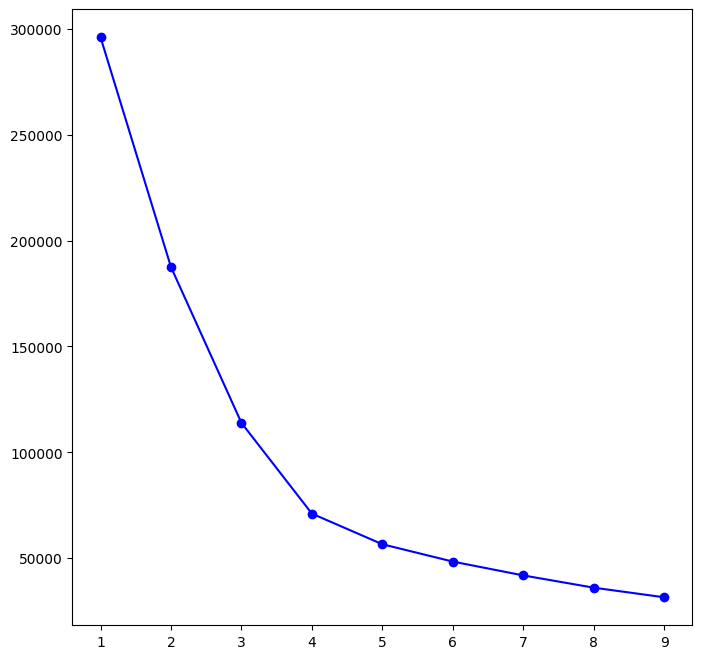

In [275]:
plt.figure(figsize=(8,8))
plt.plot(range(1,10),listK,"bo-");

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [276]:
km=KMeans(n_clusters=4)
km.fit(x_pac)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [277]:
km_pre=km.predict(x_pac)
km_pre

array([0, 1, 2, ..., 1, 2, 0], dtype=int32)

In [278]:
point = km.cluster_centers_
print('centers pint is ',point)

centers pint is  [[ 0.55353374  1.95379594]
 [-2.08471667 -0.0701773 ]
 [ 0.07517346 -1.12039261]
 [ 4.71832651 -1.02639901]]


## Plot the data points with their predicted cluster center

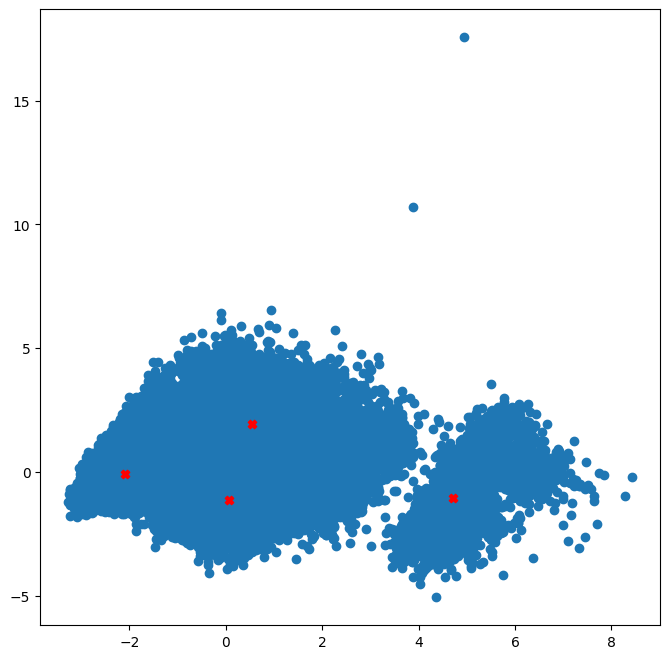

In [279]:
plt.figure(figsize=(8,8))
plt.scatter(x_pac[:,0],x_pac[:,1])
plt.scatter(point[:,0],point[:,1],marker='X',c='red');

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number? fist i used the for loop to see the k numpr on the plot
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why? i used the PCA
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?